# Air Quality in Madrid (2001-2018)

# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None) 

# Load Data

In [3]:
# importing extensions for glob files
from os.path import exists
import glob

# feather file exist or not
file_exists = exists('data/aqi_data.feather')

# if feather file dose not exist then load all the csv files, merge csv files into one and save the merged file as feather file
if(not file_exists):
    files = glob.glob("data/csvs_per_year/*.csv")
    for index,file in enumerate(files):
        files[index] = pd.read_csv(file)
    raw_df = pd.concat(files)
    raw_df.to_feather('data/aqi_data.feather')
    del(raw_df)

# loading the feather file
raw_df = pd.read_feather('data/aqi_data.feather')

# parsing the date column as datetime
raw_df['date'] = pd.to_datetime(raw_df['date'])

# setting the date column as datetime
raw_df = raw_df.set_index('date')

# Exploring Data

In [4]:
raw_df.info(show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   BEN      1041684 non-null  float64
 1   CO       2651012 non-null  float64
 2   EBE      1001724 non-null  float64
 3   MXY      315415 non-null   float64
 4   NMHC     1085312 non-null  float64
 5   NO_2     3787050 non-null  float64
 6   NOx      2376275 non-null  float64
 7   OXY      315695 non-null   float64
 8   O_3      2991732 non-null  float64
 9   PM10     2861255 non-null  float64
 10  PXY      315584 non-null   float64
 11  SO_2     2775960 non-null  float64
 12  TCH      1086441 non-null  float64
 13  TOL      1038929 non-null  float64
 14  station  3808224 non-null  int64  
 15  PM25     816424 non-null   float64
 16  NO       1532397 non-null  float64
 17  CH4      14850 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


In [5]:
raw_df.describe()

BEN            CO           EBE            MXY          NMHC  \
count  1.041684e+06  2.651012e+06  1.001724e+06  315415.000000  1.085312e+06   
mean   1.257431e+00  5.503838e-01  1.407927e+00       4.650394  1.873865e-01   
std    1.910831e+00  5.354483e-01  2.146109e+00       5.599223  1.539529e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  0.000000e+00   
25%    2.100000e-01  2.600000e-01  3.500000e-01       1.200000  9.000000e-02   
50%    6.000000e-01  4.000000e-01  8.800000e-01       2.800000  1.500000e-01   
75%    1.500000e+00  6.500000e-01  1.580000e+00       5.890000  2.400000e-01   
max    6.639000e+01  1.804000e+01  1.622000e+02     177.600006  9.070000e+00   

               NO_2           NOx            OXY           O_3          PM10  \
count  3.787050e+06  2.376275e+06  315695.000000  2.991732e+06  2.861255e+06   
mean   5.047151e+01  1.093188e+02       2.280912  3.982616e+01  2.893654e+01   
std    3.455288e+01  1.102871e+02       2.639609  3.039249e+01  2.594859e+01   
min    0.000000e+00  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%    2.400000e+01  4.000000e+01       0.960000  1.271000e+01  1.150000e+01   
50%    4.400000e+01  7.615000e+01       1.320000  3.486000e+01  2.149000e+01   
75%    6.958000e+01  1.397000e+02       2.740000  5.999000e+01  3.775000e+01   
max    6.286000e+02  2.537000e+03     103.000000  2.360000e+02  6.950000e+02   

                 PXY          SO_2           TCH           TOL       station  \
count  315584.000000  2.775960e+06  1.086441e+06  1.038929e+06  3.808224e+06   
mean        2.056178  1.065539e+01  1.435882e+00  5.876842e+00  2.807903e+07   
std         2.395130  9.121267e+00  2.332228e-01  8.524460e+00  2.028574e+01   
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  2.807900e+07   
25%         0.800000  5.840000e+00  1.300000e+00  1.100000e+00  2.807901e+07   
50%         1.280000  8.150000e+00  1.380000e+00  3.160000e+00  2.807902e+07   
75%         2.510000  1.230000e+01  1.510000e+00  6.990000e+00  2.807904e+07   
max       106.000000  1.991000e+02  1.048000e+01  2.429000e+02  2.807910e+07   

                PM25            NO           CH4  
count  816424.000000  1.532397e+06  14850.000000  
mean       13.738292  2.343886e+01      1.300849  
std        11.214146  5.021504e+01      0.195550  
min       -31.000000  0.000000e+00      0.020000  
25%         6.450000  2.000000e+00      1.170000  
50%        11.000000  6.000000e+00      1.250000  
75%        17.670000  2.000000e+01      1.400000  
max       506.899994  1.146000e+03      3.920000

In [6]:
raw_df.head()

BEN    CO   EBE  MXY  NMHC       NO_2        NOx   OXY  \
date                                                                          
2001-08-01 01:00:00  NaN  0.37   NaN  NaN   NaN  58.400002  87.150002   NaN   
2001-08-01 01:00:00  1.5  0.34  1.49  4.1  0.07  56.250000  75.169998  2.11   
2001-08-01 01:00:00  NaN  0.28   NaN  NaN   NaN  50.660000  61.380001   NaN   
2001-08-01 01:00:00  NaN  0.47   NaN  NaN   NaN  69.790001  73.449997   NaN   
2001-08-01 01:00:00  NaN  0.39   NaN  NaN   NaN  22.830000  24.799999   NaN   

                           O_3        PM10   PXY  SO_2   TCH    TOL   station  \
date                                                                            
2001-08-01 01:00:00  34.529999  105.000000   NaN  6.34   NaN    NaN  28079001   
2001-08-01 01:00:00  42.160000  100.599998  1.73  8.11  1.24  10.82  28079035   
2001-08-01 01:00:00  46.310001  100.099998   NaN  7.85   NaN    NaN  28079003   
2001-08-01 01:00:00  40.650002   69.779999   NaN  6.46   NaN    NaN  28079004   
2001-08-01 01:00:00  66.309998   75.180000   NaN  8.80   NaN    NaN  28079039   

                     PM25  NO  CH4  
date                                
2001-08-01 01:00:00   NaN NaN  NaN  
2001-08-01 01:00:00   NaN NaN  NaN  
2001-08-01 01:00:00   NaN NaN  NaN  
2001-08-01 01:00:00   NaN NaN  NaN  
2001-08-01 01:00:00   NaN NaN  NaN

In [7]:
raw_df.tail()

BEN   CO  EBE  MXY  NMHC   NO_2    NOx  OXY  O_3  PM10  PXY  SO_2  \
date                                                                            
2018-02-01  NaN  0.5  NaN  NaN   NaN   91.0  192.0  NaN  1.0  35.0  NaN   NaN   
2018-02-01  NaN  0.7  NaN  NaN   NaN  107.0  241.0  NaN  NaN  29.0  NaN  15.0   
2018-02-01  NaN  NaN  NaN  NaN   NaN   48.0   91.0  NaN  2.0   NaN  NaN   NaN   
2018-02-01  NaN  NaN  NaN  NaN   NaN  103.0  320.0  NaN  2.0   NaN  NaN   NaN   
2018-02-01  NaN  NaN  NaN  NaN   NaN   96.0  202.0  NaN  3.0  26.0  NaN   NaN   

            TCH  TOL   station  PM25     NO  CH4  
date                                              
2018-02-01  NaN  NaN  28079056  22.0   66.0  NaN  
2018-02-01  NaN  NaN  28079057   NaN   87.0  NaN  
2018-02-01  NaN  NaN  28079058   NaN   28.0  NaN  
2018-02-01  NaN  NaN  28079059   NaN  141.0  NaN  
2018-02-01  NaN  NaN  28079060   NaN   69.0  NaN

In [8]:
null_ratio_df = pd.DataFrame(round(raw_df.isnull().sum() * 100 / raw_df.shape[0],2).sort_values(ascending = False),columns=['Null Ratio'])
null_ratio_df

Null Ratio
CH4           99.61
MXY           91.72
OXY           91.71
PXY           91.71
PM25          78.56
EBE           73.70
TOL           72.72
BEN           72.65
NMHC          71.50
TCH           71.47
NO            59.76
NOx           37.60
CO            30.39
SO_2          27.11
PM10          24.87
O_3           21.44
NO_2           0.56
station        0.00

# Data cleaning

## Removing Unnecessory Column
we can see there are column with more then 40% of missing data and we can not keep them as important features sp we need to rmeove the columns with more then 40% missing data

In [9]:
columns_to_keep = list(null_ratio_df[null_ratio_df['Null Ratio'] < 40].index)
columns_to_keep

['NOx', 'CO', 'SO_2', 'PM10', 'O_3', 'NO_2', 'station']

In [10]:
aqi_df = raw_df[columns_to_keep]

In [11]:
aqi_df['year'] = aqi_df.index.copy().year
aqi_df['month'] = aqi_df.index.copy().month
aqi_df['day'] = aqi_df.index.copy().day
aqi_df['hour'] = aqi_df.index.copy().hour

In [12]:
aqi_df

NOx    CO   SO_2        PM10        O_3  \
date                                                                  
2001-08-01 01:00:00   87.150002  0.37   6.34  105.000000  34.529999   
2001-08-01 01:00:00   75.169998  0.34   8.11  100.599998  42.160000   
2001-08-01 01:00:00   61.380001  0.28   7.85  100.099998  46.310001   
2001-08-01 01:00:00   73.449997  0.47   6.46   69.779999  40.650002   
2001-08-01 01:00:00   24.799999  0.39   8.80   75.180000  66.309998   
...                         ...   ...    ...         ...        ...   
2018-02-01 00:00:00  192.000000  0.50    NaN   35.000000   1.000000   
2018-02-01 00:00:00  241.000000  0.70  15.00   29.000000        NaN   
2018-02-01 00:00:00   91.000000   NaN    NaN         NaN   2.000000   
2018-02-01 00:00:00  320.000000   NaN    NaN         NaN   2.000000   
2018-02-01 00:00:00  202.000000   NaN    NaN   26.000000   3.000000   

                           NO_2   station  year  month  day  hour  
date                                                               
2001-08-01 01:00:00   58.400002  28079001  2001      8    1     1  
2001-08-01 01:00:00   56.250000  28079035  2001      8    1     1  
2001-08-01 01:00:00   50.660000  28079003  2001      8    1     1  
2001-08-01 01:00:00   69.790001  28079004  2001      8    1     1  
2001-08-01 01:00:00   22.830000  28079039  2001      8    1     1  
...                         ...       ...   ...    ...  ...   ...  
2018-02-01 00:00:00   91.000000  28079056  2018      2    1     0  
2018-02-01 00:00:00  107.000000  28079057  2018      2    1     0  
2018-02-01 00:00:00   48.000000  28079058  2018      2    1     0  
2018-02-01 00:00:00  103.000000  28079059  2018      2    1     0  
2018-02-01 00:00:00   96.000000  28079060  2018      2    1     0  

[3808224 rows x 11 columns]

## Visualize Features

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [14]:
yearly_df = aqi_df.groupby('year')[columns_to_keep].mean().copy()
monthly_df = aqi_df.groupby('month')[columns_to_keep].mean().copy()
daily_df = aqi_df.groupby('day')[columns_to_keep].mean().copy()
hourly_df = aqi_df.groupby('hour')[columns_to_keep].mean().copy()

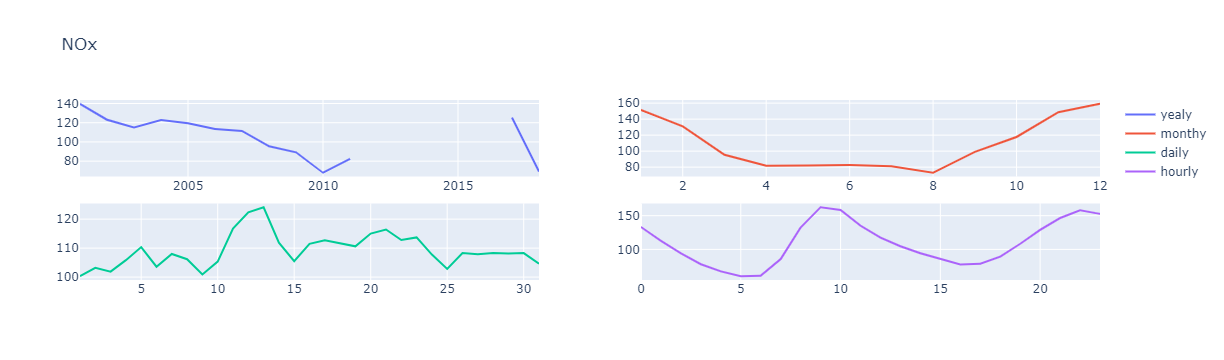

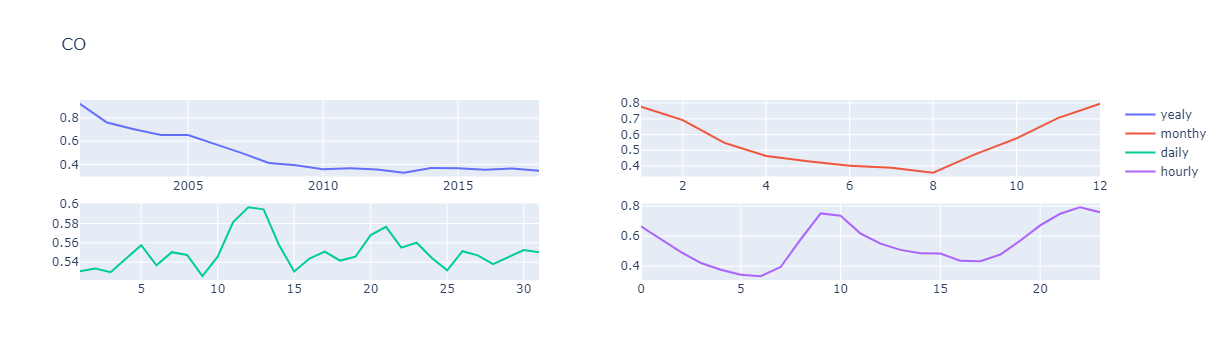

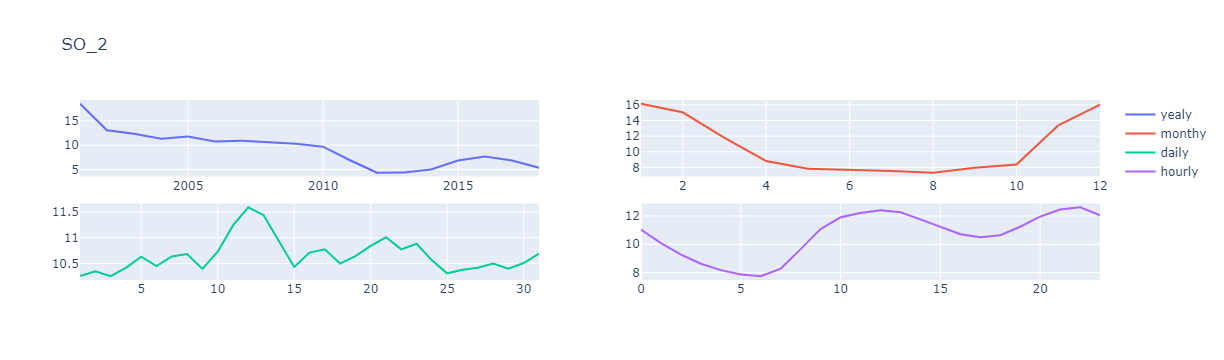

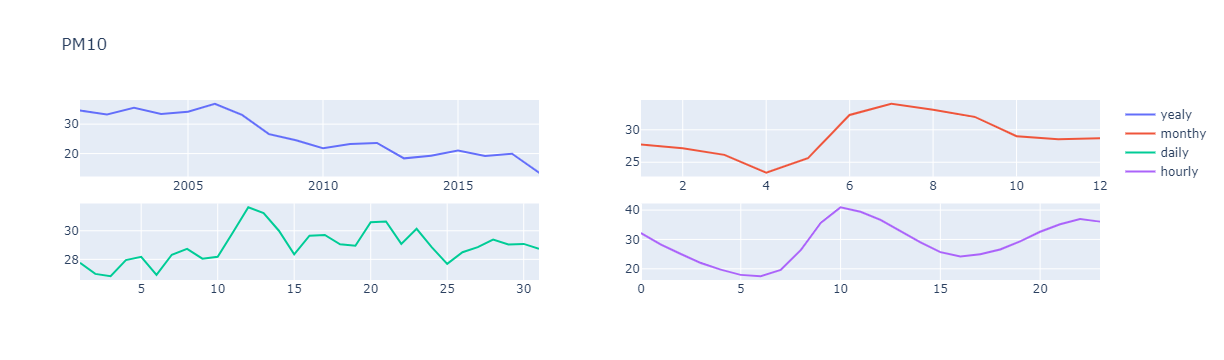

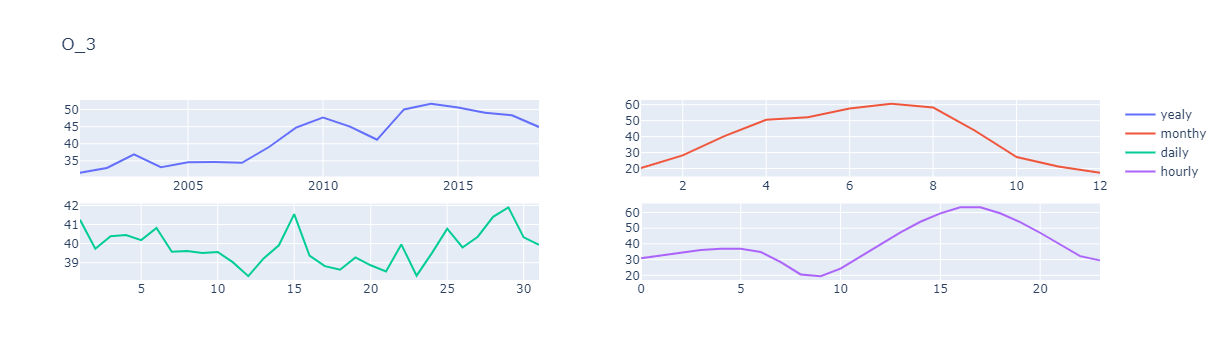

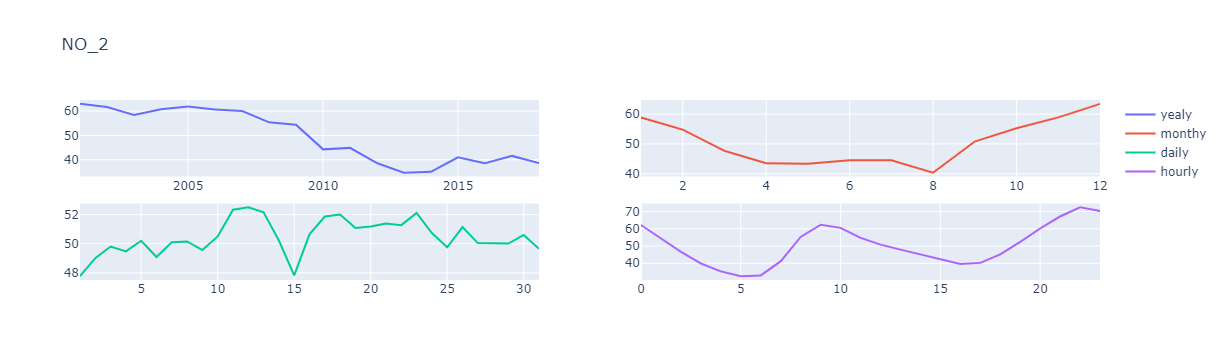

In [15]:
for col in columns_to_keep:
    if col != 'station':
        fig = make_subplots(rows=2, cols=2)
        fig.add_trace(
            go.Scatter(x=yearly_df.index, y=yearly_df[col],mode="lines",name='yealy'),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=monthly_df.index, y=monthly_df[col],mode="lines",name='monthy'),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=daily_df.index, y=daily_df[col],mode="lines",name='daily'),
            row=2, col=1
        )
        fig.add_trace(
            go.Scatter(x=hourly_df.index, y=hourly_df[col],mode="lines",name='hourly'),
            row=2, col=2
        )
        fig.update_layout(title_text=f"{col}")
        fig.show()

## Missing Value Filling
#### Inference
<p> We can see that simply replacing the missing values with the nearest datapoints does not completely solve our missing data problem. In addition dropping the rows with missing data causes a total loss of the entire data. we cannot simply replace missing values with random figures like 0 or 1 in other to avoid too great an influence on our data or setting up a kind of data bias.</p>
<p> The following strategy shall be used to handle our missing data;</p>
<ol>
    <li> Missing values in other features will be replaced with respect to station with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
    <li> Left-over Missing values will be replaced with respect to month  with their mean values.</li>
</ol>

In [16]:
aqi_df.iloc[:,aqi_df.columns != 'station'] = aqi_df.groupby('station').transform(lambda x: x.fillna(x.mean())).copy()

In [17]:
aqi_df.iloc[:,aqi_df.columns != 'month'] = aqi_df.groupby('month').transform(lambda x: x.fillna(x.mean())).copy()

## Cleaned Data visualization

In [18]:
yearly_df = aqi_df.groupby('year')[columns_to_keep].mean().copy()
monthly_df = aqi_df.groupby('month')[columns_to_keep].mean().copy()
daily_df = aqi_df.groupby('day')[columns_to_keep].mean().copy()
hourly_df = aqi_df.groupby('hour')[columns_to_keep].mean().copy()

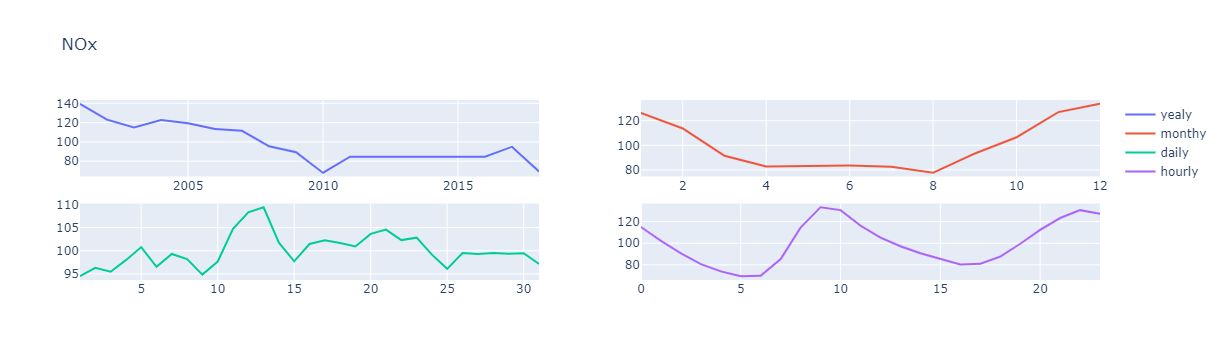

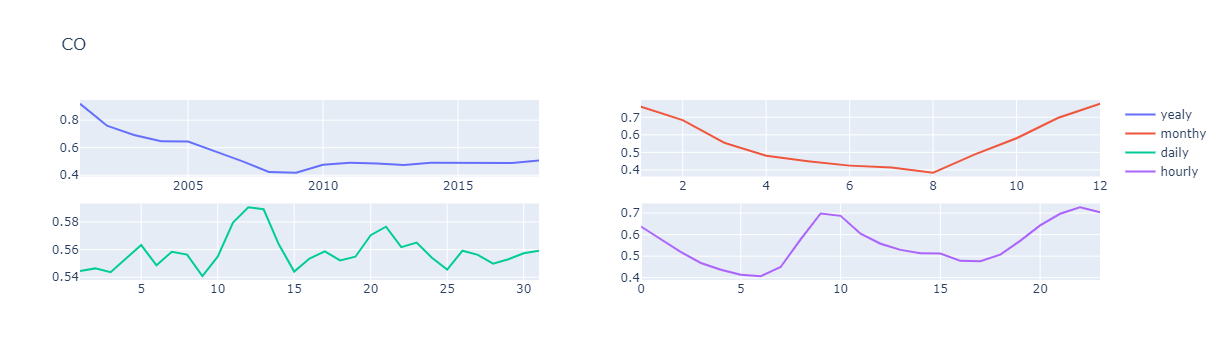

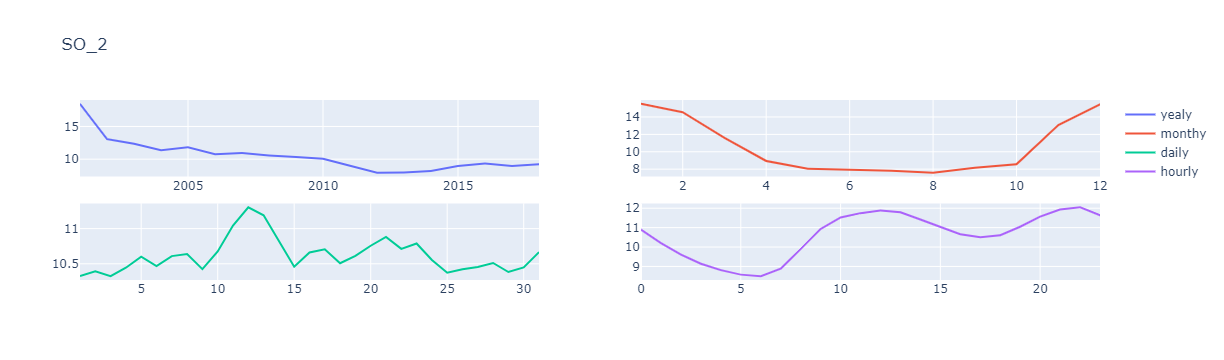

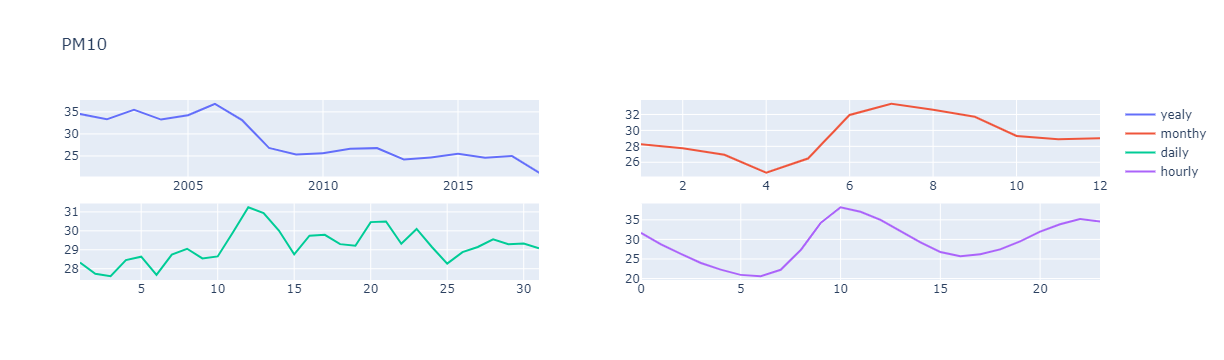

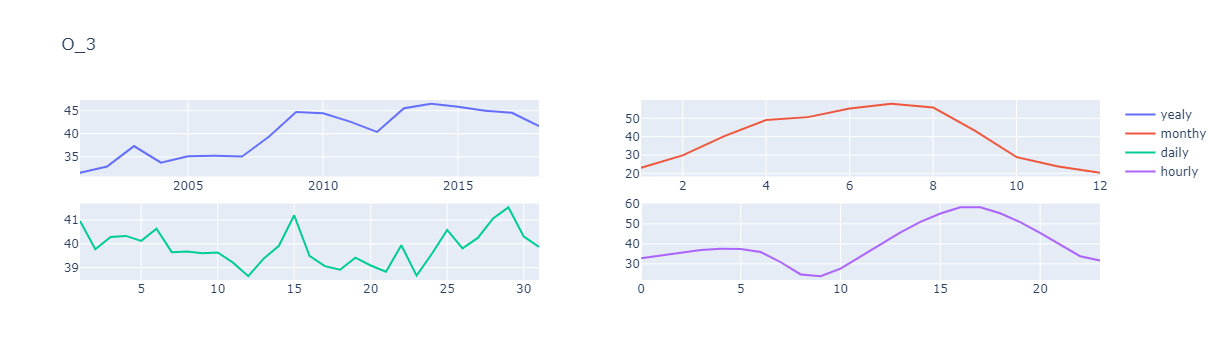

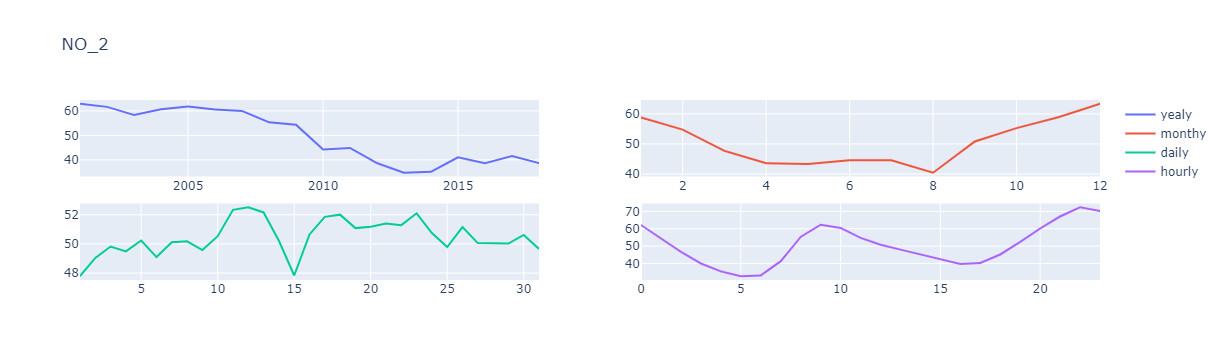

In [19]:
for col in columns_to_keep:
    if col != 'station':
        fig = make_subplots(rows=2, cols=2)
        fig.add_trace(
            go.Scatter(x=yearly_df.index, y=yearly_df[col],mode="lines", name='yealy'),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=monthly_df.index, y=monthly_df[col],mode="lines", name='monthy'),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=daily_df.index, y=daily_df[col],mode="lines", name='daily'),
            row=2, col=1
        )
        fig.add_trace(
            go.Scatter(x=hourly_df.index, y=hourly_df[col],mode="lines", name='hourly'),
            row=2, col=2
        )
        fig.update_layout(title_text=f"{col}")
        fig.show()

# AQI Calculation
https://app.cpcbccr.com/ccr_docs/How_AQI_Calculated.pdf
https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial/notebook

In [20]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

aqi_df["PM10_24hr_avg"] = aqi_df.groupby("station")["PM10"].rolling(window = 24, min_periods = 1).mean().copy().values
aqi_df["PM10_SubIndex"] = aqi_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x)).copy()

In [21]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

aqi_df["SO2_24hr_avg"] = aqi_df.groupby("station")["SO_2"].rolling(window = 24, min_periods = 1).mean().copy().values
aqi_df["SO2_SubIndex"] = aqi_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x)).copy()

In [22]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

    
aqi_df["NOx_24hr_avg"] = aqi_df.groupby("station")["NOx"].rolling(window = 24, min_periods = 1).mean().copy().values
aqi_df["NOx_SubIndex"] = aqi_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x)).copy()

In [23]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

aqi_df["CO_8hr_max"] = aqi_df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().copy().values
aqi_df["CO_SubIndex"] = aqi_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x)).copy()

In [24]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

aqi_df["O3_8hr_max"] = aqi_df.groupby("station")["O_3"].rolling(window = 8, min_periods = 1).max().copy().values
aqi_df["O3_SubIndex"] = aqi_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x)).copy()

In [25]:
aqi_df["aqi"] = round(aqi_df[["PM10_SubIndex","SO2_SubIndex","NOx_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))

In [26]:
final_aqi_df = aqi_df[['NOx', 'CO', 'SO_2', 'PM10', 'O_3', 'NO_2', 'station', 'year', 'month','day', 'hour','aqi']].copy()

# AQI Visualization

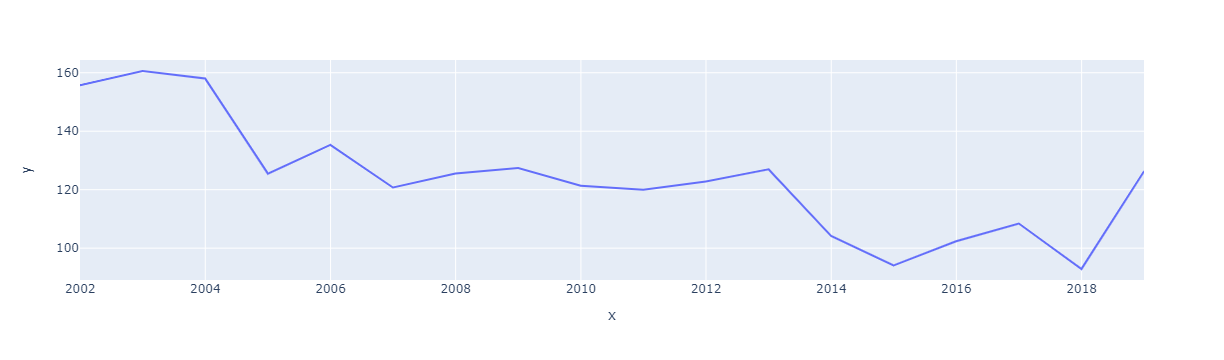

In [27]:
temp_aqi = final_aqi_df.resample('Y').mean()
px.line(
    x=temp_aqi.index,
    y=temp_aqi["aqi"]
)

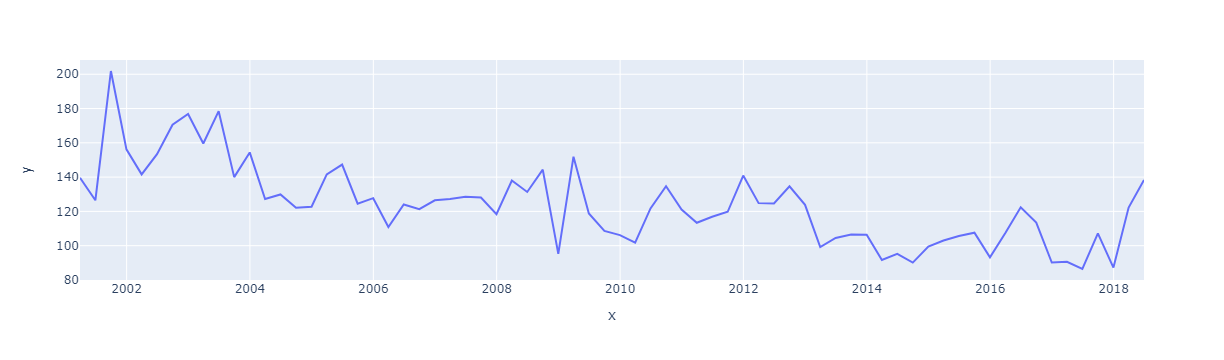

In [28]:
temp_aqi = final_aqi_df.resample('Q').mean()
px.line(
    x=temp_aqi.index,
    y=temp_aqi["aqi"]
)

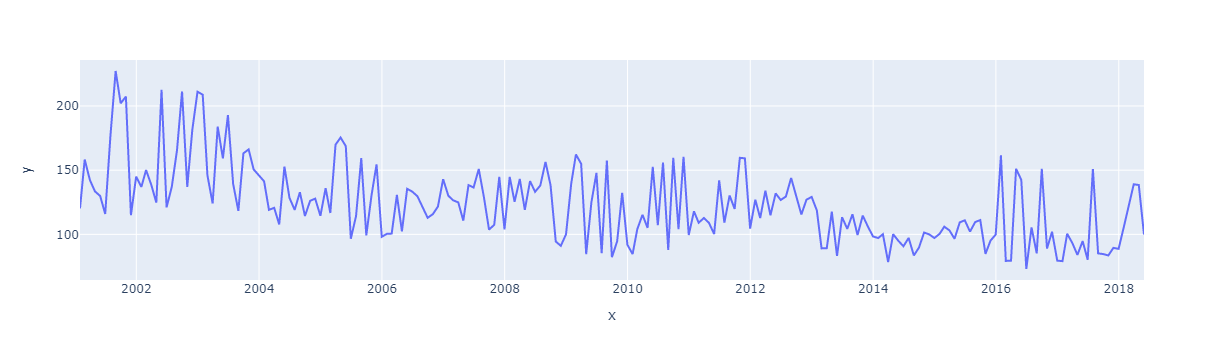

In [29]:
temp_aqi = final_aqi_df.resample('M').mean()
px.line(
    x=temp_aqi.index,
    y=temp_aqi["aqi"]
)

# Forecasting AQI (Monthly)

In [30]:
!pip install pmdarima --quiet

In [31]:
aqi = final_aqi_df.resample('M').mean()[['aqi']]
test_len = 12
print(f'shape of data : {aqi.shape}')

shape of data : (209, 1)


## Check For Stationarity

In [32]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.07)
adf_test.should_diff(aqi['aqi'])

(0.01, False)

## Check For Seasonality

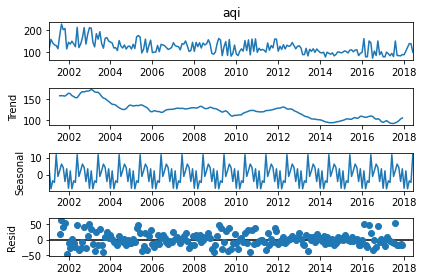

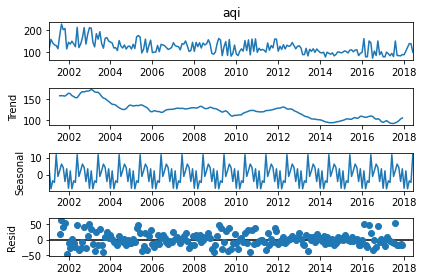

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(aqi['aqi'])
result.plot()

In [ ]:
from pmdarima import auto_arima
setwise_fit = auto_arima(aqi['aqi'], start_p=0, max_p=5, d=1, max_d=5, start_q=0, max_q=5, start_P=0, max_P=5, D=1, max_D=5, start_Q=0, max_Q=5, 
                         m=12, seasonal=True,error_action='warn',trace=False, suppress_warnings=True, stepwise=True, random_state=True,n_fits=50)
setwise_fit.summary()

## Model Validation

In [ ]:
train = aqi.iloc[:-test_len]
test = aqi.iloc[-test_len:]
print(f"train : {train.shape}")
print(f"test : {test.shape}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# start and end
start=len(train)
end=len(train)+len(test)-1

# model
model = ARIMA(train['aqi'],order=(5,1,1), seasonal_order=(3, 1, 0, 12))
model = model.fit()
# method_kwargs={"warn_convergence": False}

#prediction
pred = model.predict(start=start, end=end)

# plot predicted vs actual
pred.plot(legend=True)
test['aqi'].plot(legend=True)

# root mean square error of model
from math import sqrt
rsme = sqrt(mean_squared_error(pred,test['aqi']))
print(f"mean of test df : {test['aqi'].mean()}")
print(f'resme : {rsme}')

## Forecast

In [ ]:
model = ARIMA(aqi['aqi'],order=(5,1,1), seasonal_order=(3, 1, 0, 12))
model = model.fit()

In [ ]:
# 36 months future
start = len(aqi)
end = len(aqi) + 36
pred = model.predict(start=start, end=end)
px.line(x=aqi['aqi'])
pred.plot(legend=True)
aqi['aqi'].plot(legend=True)